# Decision Tree Regressor

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os

In [11]:
df = pd.read_csv('C:\\Users\\shiva\\Climate-Visibility-Prediction\\Dataset\\NOAA-JKF-AP.csv')

In [12]:
data

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-09-18 20:51:00,10.0,64,59,55,73,6,160,30.17,30.19,0.0
1,2010-09-18 21:51:00,10.0,63,58,55,75,3,160,30.17,30.19,0.0
2,2010-09-18 22:51:00,10.0,63,58,55,75,3,190,30.17,30.19,0.0
3,2010-09-18 23:51:00,10.0,63,59,56,78,3,210,30.16,30.18,0.0
4,2010-09-19 00:51:00,10.0,63,59,56,78,5,200,30.16,30.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6252,2011-06-06 09:51:00,10.0,76,64,55,48,7,350,30.01,30.03,0.0
6253,2011-06-06 10:51:00,10.0,77,63,53,43,8,10,30.00,30.02,0.0
6254,2011-06-06 11:51:00,10.0,79,63,52,39,5,50,30.00,30.02,0.0
6255,2011-06-06 12:51:00,10.0,80,64,54,41,3,50,29.98,30.00,0.0


In [13]:
data.shape

(6257, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              6257 non-null   object 
 1   VISIBILITY        6257 non-null   float64
 2   DRYBULBTEMPF      6257 non-null   int64  
 3   WETBULBTEMPF      6257 non-null   int64  
 4   DewPointTempF     6257 non-null   int64  
 5   RelativeHumidity  6257 non-null   int64  
 6   WindSpeed         6257 non-null   int64  
 7   WindDirection     6257 non-null   int64  
 8   StationPressure   6257 non-null   float64
 9   SeaLevelPressure  6257 non-null   float64
 10  Precip            6257 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 537.8+ KB


In [15]:
data = data.drop("DATE",axis=1)

In [16]:
data

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,10.0,64,59,55,73,6,160,30.17,30.19,0.0
1,10.0,63,58,55,75,3,160,30.17,30.19,0.0
2,10.0,63,58,55,75,3,190,30.17,30.19,0.0
3,10.0,63,59,56,78,3,210,30.16,30.18,0.0
4,10.0,63,59,56,78,5,200,30.16,30.18,0.0
...,...,...,...,...,...,...,...,...,...,...
6252,10.0,76,64,55,48,7,350,30.01,30.03,0.0
6253,10.0,77,63,53,43,8,10,30.00,30.02,0.0
6254,10.0,79,63,52,39,5,50,30.00,30.02,0.0
6255,10.0,80,64,54,41,3,50,29.98,30.00,0.0


<Axes: >

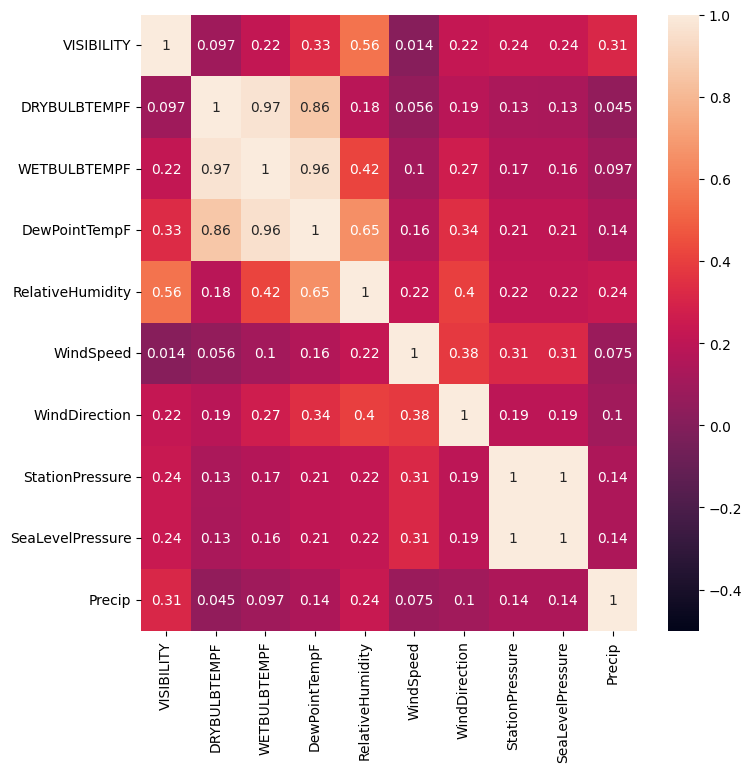

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

In [18]:
# we can drop highly correlated variables

In [19]:
data = data.drop(['WETBULBTEMPF','DewPointTempF',"StationPressure"],axis=1)

In [20]:
data

,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Precip
0,10.0,64,73,6,160,30.19,0.0
1,10.0,63,75,3,160,30.19,0.0
2,10.0,63,75,3,190,30.19,0.0
3,10.0,63,78,3,210,30.18,0.0
4,10.0,63,78,5,200,30.18,0.0
...,...,...,...,...,...,...,...
6252,10.0,76,48,7,350,30.03,0.0
6253,10.0,77,43,8,10,30.02,0.0
6254,10.0,79,39,5,50,30.02,0.0
6255,10.0,80,41,3,50,30.00,0.0


<Axes: >

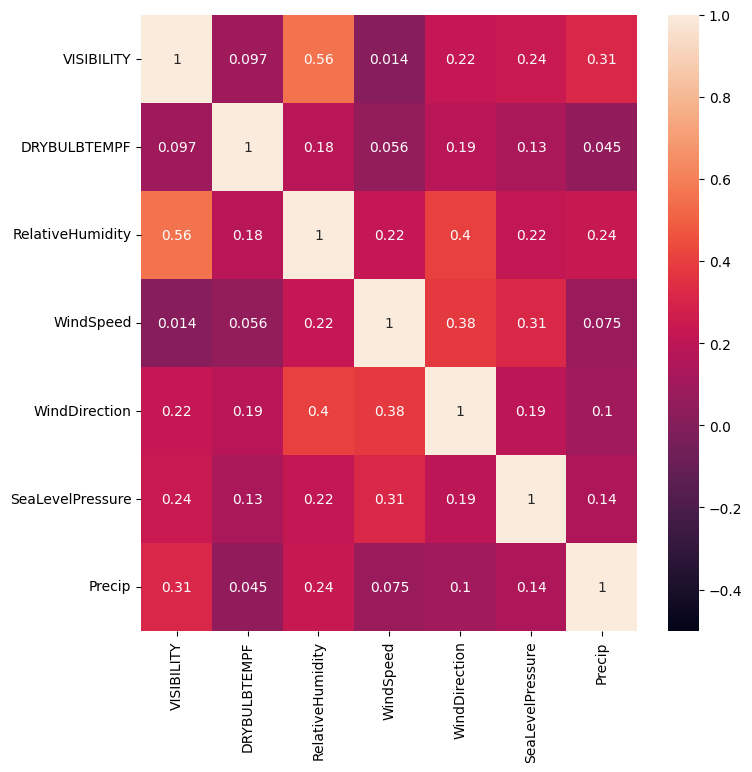

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [22]:
X = data.drop('VISIBILITY', axis=1)
y = data['VISIBILITY']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Initialize the Decision Tree Regressor

dt_regressor = DecisionTreeRegressor()

# Define the hyperparameters and their values for tuning:

param_grid = {
    'max_depth': [None, 1, 2 , 3 , 5 , 8 , 10, 20, 30],
    'min_samples_split': [1, 2, 3 , 4, 7, 8,  10, 20 , 25],
    'min_samples_leaf': [1, 2, 5, 10, 12]
}

In [26]:
# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [27]:
# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

/Users/shrish/Desktop/ATC - Visibility Prediction/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shrish/Desktop/ATC - Visibility Prediction/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shrish/Desktop/ATC - Visibility Prediction/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/shrish/Desktop/ATC - Visibility Predictio

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 5, 8, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10, 12],
                         'min_samples_split': [1, 2, 3, 4, 7, 8, 10, 20, 25]},
             scoring='neg_mean_squared_error')

In [28]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [29]:

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Parameters: {best_params}")

Mean Squared Error: 2.423586684683822
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 25}


In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Best Parameters: {best_params}")

Mean Absolute Error: 0.7040995889040436
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 25}


In [31]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R^2-Score : {r2}")
print(f"Best Parameters: {best_params}")

R^2-Score : 0.6458855970740616
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 25}


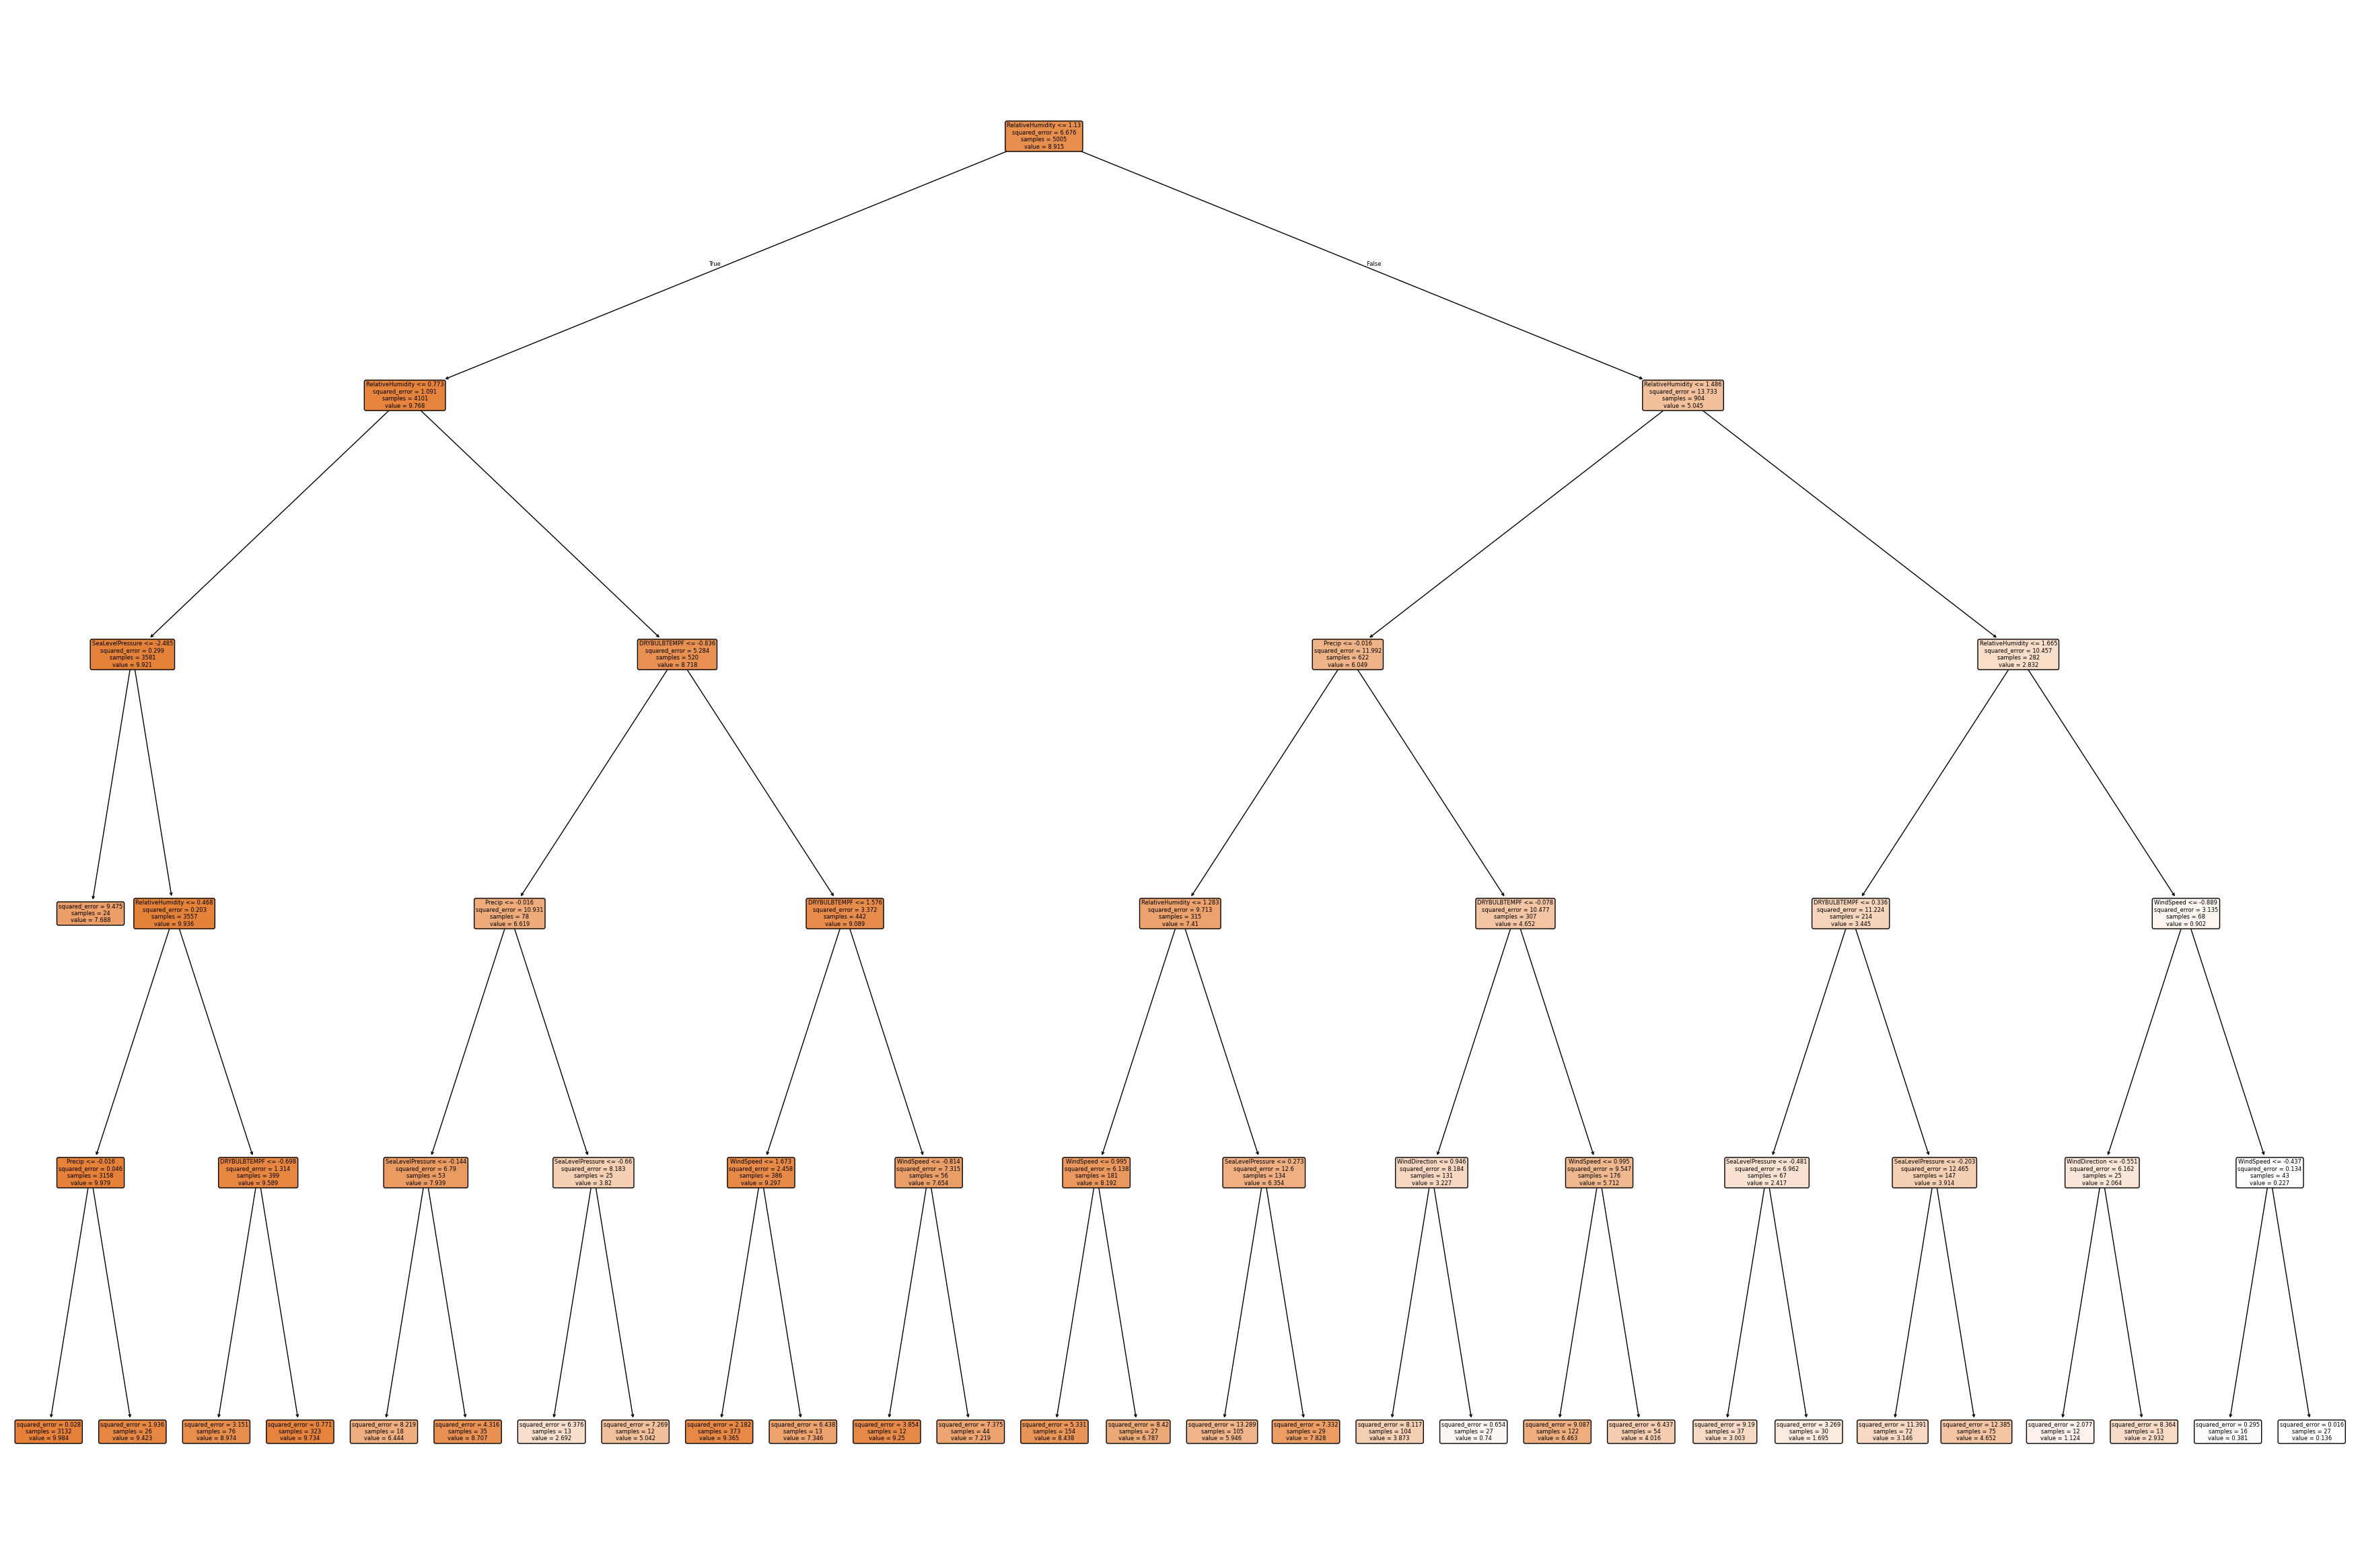

In [32]:
plt.figure(figsize=(45,30))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()